# HW3 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/12 (Tues)  11:59 AM [Before Class Start]

## Notice Class schedule
<table>
  <tr>
    <th>Date</th>
    <th>Desc.</th>
  <tr>
    <td>5/29</td>
    <td>MID-TERM EXAM & HW#3 Start Date</td>
  </tr>
  <tr>
    <td>5/31</td>
    <td>HW#2 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/12</td>
    <td>HW#3 Due Date & HW#4(Project) Start Date</td>
  </tr>
  <tr>
    <td>6/19</td>
    <td>HW#3 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/21</td>
    <td>FINAL EXAM(NOT FIXED)</td>
  </tr>
  <tr>
    <td>6/26</td>
    <td>HW#4(Project) Due Date(NO LATE HAND-IN)</td>
  </tr>
</table>

## Assignment Credit

### Your assignments are 30% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 7%__
- __HW#3: 8%__
- __HW#4(Project): 10%__

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2000-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Problem 1-1 Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- Apply regression model for 2000-2015 data only.
- You should use same datasets in HW#2[infant mortality rate and GDP]
- xData : GDP per capita
- yData : Infant morality rate 
- Please print __MSE__ of implemented model.

In [2]:
#load data and filtering data (2000-2015) you can use HW#2 preprocessing code
tsv = pd.read_csv('GDPperCapByTab(1).txt',sep='\t',index_col=0) 
tsv2 = pd.read_csv('InfantMortalityByTab(1).txt',sep='\t',index_col=0) 
###YOUR CODE HERE###

tsv= tsv.filter(items=[str(num) for num in range(2000, 2016)])
tsv=tsv.dropna(axis=0)
#TODO: modify data type as float type
for column in tsv:
    for index, values in tsv.iterrows():
        if(type(values[column])==type('A')):
            tsv.set_value(index, column, values[column].replace(',',''))
        tsv.set_value(index, column, float(values[column]))
        
for A in range(2000, 2015, 5):
    list_ = [*map(str, range(A, A+6))]
    list_ = [*(map(str, list_))]
    tsv[str(A)+'-'+str(A+5)] = pd.Series(tsv[list_].median(axis=1), index=tsv.index).astype('int')
    
tsv = tsv.filter(['2000-2005', '2005-2010', '2010-2015'])
tsv2 = tsv2.filter(['2000-2005', '2005-2010', '2010-2015'])

tsv = tsv.filter(items=tsv2.index, axis='index')
tsv2 = tsv2.filter(items=tsv.index, axis='index')

C:\Users\l5vd5\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\l5vd5\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [9]:
lr = LinearRegression()

xData=tsv
yData=tsv2

#xData=np.array(xData).reshape((-1, 1))
#yData=np.array(yData).reshape((-1, 1))

#TODO
lr.fit(xData, yData)
print ("MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData))

MSE - scikit learn linear regression:  579.3266628062094


### Problem 1-2 Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [10]:
#TODO: import api(s) to implement the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

for deg in range(10):
    #TODO
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), Ridge())
    
    plr = PolynomialRegression.fit(xData, yData)
    print ("MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(xData), yData))

MSE - poly-linear regression; degree= 0 :  828.492934380071
MSE - poly-linear regression; degree= 1 :  579.3266628062091
MSE - poly-linear regression; degree= 2 :  448.2686047130396
MSE - poly-linear regression; degree= 3 :  312.83815908681976
MSE - poly-linear regression; degree= 4 :  261.6596349432353
MSE - poly-linear regression; degree= 5 :  1286.2897393810167
MSE - poly-linear regression; degree= 6 :  892.6495217772698
MSE - poly-linear regression; degree= 7 :  556.1598863982161
MSE - poly-linear regression; degree= 8 :  688.4280535746252
MSE - poly-linear regression; degree= 9 :  710.5473486812792


C:\Users\l5vd5\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.979125274008217e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\l5vd5\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.953611392231478e-32 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\l5vd5\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.819112040571272e-42 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\l5vd5\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares so

### Problem 1-3 The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

### YOUR ANSWER HERE ###



### Problem 1-4 To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [17]:
#TODO: import API for deviding training and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData, yData, test_size=0.2)
#TODO

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), Ridge())#TODO: as above (Prob. 5-2)

    plr = PolynomialRegression.fit(x_train, y_train)
    print ("MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val))

MSE - sklearn poly-linear regression; degree= 0 
	train:  843.1393302662037 ,	val:  771.8571152983126
MSE - sklearn poly-linear regression; degree= 1 
	train:  602.3232970923575 ,	val:  516.2802181559177
MSE - sklearn poly-linear regression; degree= 2 
	train:  476.3415931251731 ,	val:  361.9441876549104
MSE - sklearn poly-linear regression; degree= 3 
	train:  319.4425666512722 ,	val:  1569.5443848498128
MSE - sklearn poly-linear regression; degree= 4 
	train:  253.53239542088804 ,	val:  239191.29982264884
MSE - sklearn poly-linear regression; degree= 5 
	train:  712.4848989515525 ,	val:  267209181.465134
MSE - sklearn poly-linear regression; degree= 6 
	train:  2223.9977299491575 ,	val:  21147128820.859303
MSE - sklearn poly-linear regression; degree= 7 
	train:  3200.9752986273465 ,	val:  339285302453415.06
MSE - sklearn poly-linear regression; degree= 8 
	train:  707.9348196417859 ,	val:  308966.4731762517
MSE - sklearn poly-linear regression; degree= 9 
	train:  713.0360731593806 

C:\Users\l5vd5\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.006096581004112e-22 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\l5vd5\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.481126179473933e-32 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\l5vd5\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.062123502923998e-42 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\l5vd5\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares so

### Problem 1-5 We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so. 
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

### YOUR ANSWER HERE ###

## Problem2. Regression Model
## -Amzon stock price prediction.

### Problem 2-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [18]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('AMZN.csv',sep=',')

In [19]:
raw_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [13]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___
x_data 
    : <class 'numpy.ndarray'>
    : created data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use

    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [20]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    ##### Your Code Here #####
    for idx, value in enumerate(col_data):
        if idx < len(col_data)-lookback:
            x_datas.append(col_data[idx:idx+lookback])
            y_datas.append(raw_data['Close'].values[idx+lookback])
        else:
            break
   ##########################
    x_data = np.asarray(x_datas)#np.concatenate(x_datas)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [11]:
"""
 -- TODO : make split_data function which split train / test (8/2 rate)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\n -- TODO : make split_data function which split train / test (8/2 rate)\n\n@Function\nsplit_data\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [21]:
def split_data(x,y):
    ##### Your Code Here ####
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, shuffle=False)
    ###########################
    return x_train, x_test, y_train, y_test

In [22]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [29]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((4226, 5), (4226,), (1057, 5), (1057,))

### <br/>Problem 2-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [35]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
    PolynomialRegression2 = make_pipeline(PolynomialFeatures(poly_degree), linear_model.LinearRegression())
    
    model = PolynomialRegression2.fit(x_train, y_train)
    
    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(x_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(x_test), y_test))
    
    test_pred = model.predict(x_test)
    
    return test_pred, y_test

In [58]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=1250, poly_degree=1)

MSE - Train 5.9901
MSE - Test 344.8041


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable :       <br/>
Lookback :       <br/>
Poly_degree :       <br/>

### Problem 2-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

### Problem 2-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [59]:
# TODO : Assign your best prediction for test data to best_pred

best_pred = test_pred

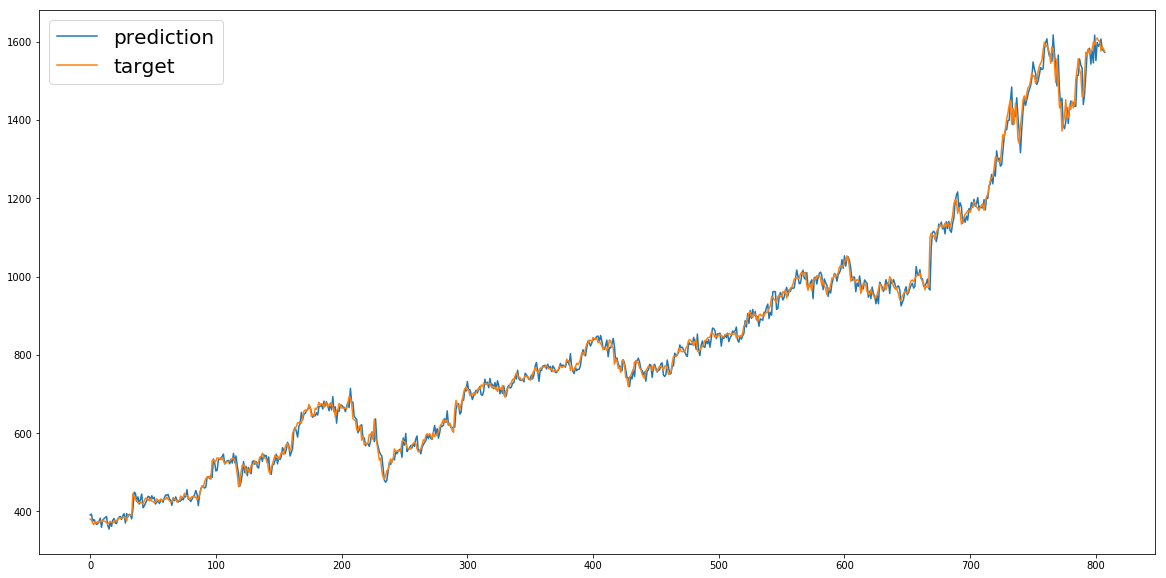

In [60]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem3. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3-1 Load Data
- Load amazon_cells_labelled.tsv and make pandas dataframe.

In [63]:
amazon_review = pd.read_csv('amazon_cells_labelled.tsv',sep='\t') 
#TODO
amazon_review

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


### Problem 3-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [67]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amajon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    ###YOUR CODE HERE###
    vectorizer.fit(data['Review'])
    x = vectorizer.transform(data['Review'])
    bow = x.toarray()

    
    return vectorizer, bow

In [68]:
vectorizer, bow = make_review_bow(amazon_review)
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())#TODO
bow_df

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [69]:
###YOUR CODE HERE###
x_train, x_test, y_train, y_test = train_test_split(bow_df, amazon_review['Sentiment'], shuffle= True, test_size=0.2)

### Problem 3-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [70]:
from sklearn.linear_model import SGDClassifier

In [71]:
###YOUR CODE HERE###

SGDC = SGDClassifier()
model2 = SGDC.fit(x_train, y_train)

C:\Users\l5vd5\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [37]:
sgdScore = SGDC.score(x_test, y_test)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.835000


### Problem 3-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [72]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
###YOUR CODE HERE###
MNB = MultinomialNB()
model3 = MNB.fit(x_train, y_train)

In [74]:
nbScore = MNB.score(x_test, y_test)#TODO
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.860000


### Problem 3-6 Select the Best Model with 5 fold Cross Validation
- Split your data (1000 reviews) __Train: 600 / Validation: 200 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Choose model you want to use(SGD or NB or both) and give us reason why you choose it.
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

In [75]:
#Split Data
###YOUR CODE HERE###
x_train, x_test, y_train, y_test = train_test_split(bow_df, amazon_review['Sentiment'], test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1.0/3.0)

### YOUR ANSWER HERE [reason why you choose that model] ###


In [76]:
###YOUR CODE HERE###

model4 = MNB.fit(x_train, y_train)
model5 = SGDC.fit(x_train, y_train)

C:\Users\l5vd5\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [77]:
###YOUR CODE HERE###
from sklearn.model_selection import cross_val_score

print(cross_val_score(model4, x_val, y_val))
print(cross_val_score(model5, x_val, y_val))

[0.74157303 0.7752809  0.69662921]
[0.75280899 0.73033708 0.68539326]


C:\Users\l5vd5\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\l5vd5\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\l5vd5\Anaconda3\lib\sit

In [78]:
score = model4.score(x_test, y_test)#TODO
print ("Model Accuracy: %f" % score)

Model Accuracy: 0.835000


## Problem4. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [82]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

### Problem 4-1 Pick 3 Categories you want and download

In [80]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""
categories = ['alt.atheism', 'comp.graphics', 'sci.med']

In [83]:
dataset = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=45)

In [84]:
print("%s" % dataset.description)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

the 20 newsgroups by date dataset
1104 documents
3 categories


### Problem 4-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [89]:
tfidf_vectorizer = TfidfVectorizer(min_df=0)
tfidf_vectorizer.fit(dataset.data)#TODO
tfidf_matrix = tfidf_vectorizer.transform(dataset.data)#TODO
tfidf_matrix
#bow2= tfidf_matrix.toarray()
#bow_df2 = pd.DataFrame(bow2, columns=tfidf_vectorizer.get_feature_names())

#bow_df2

<1104x25652 sparse matrix of type '<class 'numpy.float64'>'
	with 179276 stored elements in Compressed Sparse Row format>

In [87]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=0).fit(tfidf_matrix)#TODO
#TODO
clusters = km.labels_.tolist()

### Problem 4-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

### Problem 4-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [90]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

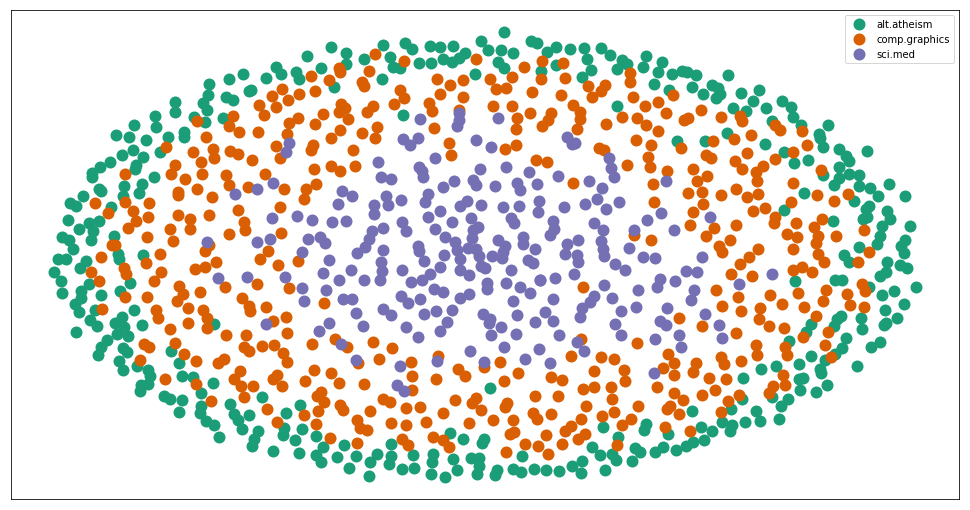

In [91]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
    #print(df)
    #A=[dict(x=list[1], y=list[2]) for list in df.values]
    #groups = list(zip(df.label.tolist(), A))
    
    groups = df.groupby('label')
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name],#TODO, 
                color= cluster_colors[name],#TODO, 
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show()

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)